This is the code for the credit card fraud detection.  
The algorithm used in this code is Isolation Forest.  
it is a unsupervised technique....

Core Idea  
Isolation Forest works by isolating anomalies rather than profiling normal points. It builds random trees (called isolation trees) and uses the fact that anomalies are:

Few in number

Different in feature values

Hence, they are easier to isolate in fewer splits (shorter paths in the tree).

How It Works  
1.Subsample the dataset randomly.

2.For each subsample, build a tree by:

 Randomly selecting a feature

 Randomly selecting a split value between the max and min of that feature

 Repeating the process until:

   The point is isolated

   The tree reaches a height limit

3.Compute the average path length for each data point across all trees.

 Short path → likely anomaly

 Long path → likely normal

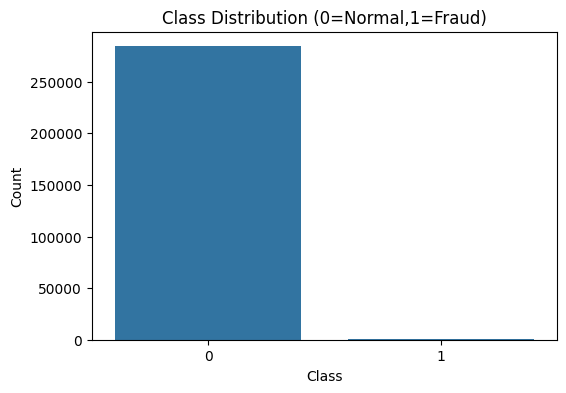

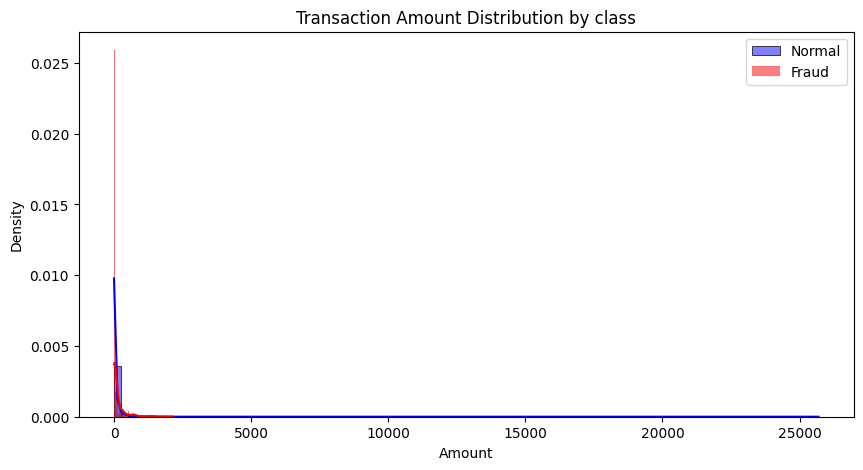

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.24      0.28      0.26       492

    accuracy                           1.00    284807
   macro avg       0.62      0.64      0.63    284807
weighted avg       1.00      1.00      1.00    284807

Confusion Matrix
[[283883    432]
 [   354    138]]


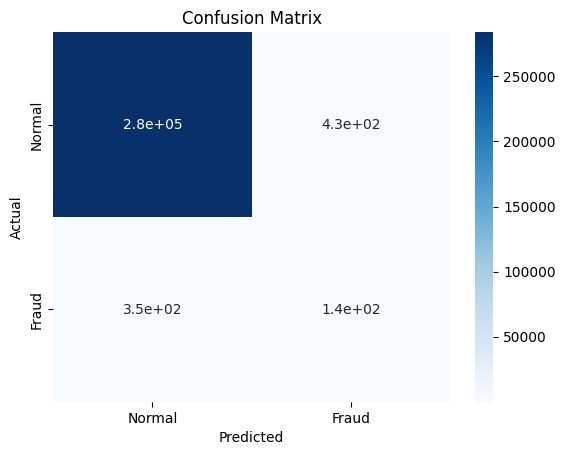

c:\Users\prash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


New Sample Prediction: Normal


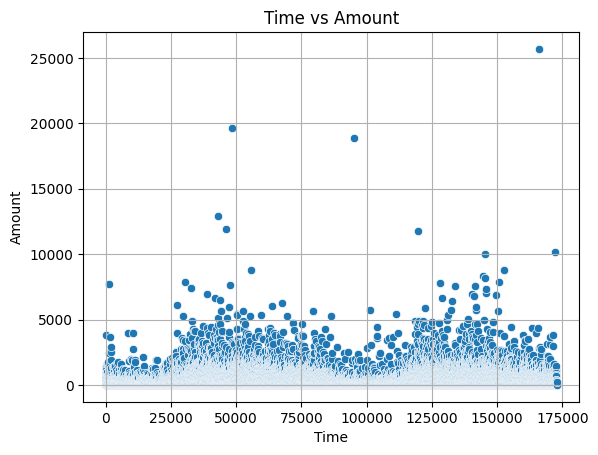

In [3]:
import pandas as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.decomposition import PCA

#file path detection
file_path="C:/Users/prash/OneDrive/Desktop/CREST/Some MiniPrijects/Real Time Credit Card Fraud Detection/creditcards.csv"

#check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"CSV file is not found at the path:{file_path}")
 

#Load Dataset
df=pd.read_csv(file_path)

#Data Analysis
#1.Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title("Class Distribution (0=Normal,1=Fraud)")
plt.xlabel("Class")
plt.ylabel('Count')
plt.show()

#2. Transaction amount distribution by class
plt.figure(figsize=(10,5))
sns.histplot(data=df[df['Class']==0],x='Amount',bins=100,color='blue',label='Normal',stat='density',kde=True)
sns.histplot(data=df[df['Class']==1],x='Amount',bins=100,color='red',label='Fraud',stat='density',kde=True)
plt.legend()
plt.title("Transaction Amount Distribution by class")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.show()

#Model Training and Testing
X=df.drop('Class',axis=1)
y=df['Class']

#Standardize the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#Initialize Isolation Forest
model=IsolationForest(contamination=0.002,random_state=42)
model.fit(X_scaled)

#Predict(1=normal , -1=anomaly)
y_pred=model.predict(X_scaled)

#Convert to 0=normal, 1=fraud
y_pred=[1 if x==-1 else 0 for x in y_pred]

#Evluation
print('Classification Report')
print(classification_report(y,y_pred))

print('Confusion Matrix')
print(confusion_matrix(y,y_pred))

conf_mat=confusion_matrix(y,y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues',xticklabels=['Normal', 'Fraud'],yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Predict on a new sample
sample=df.iloc[[0]]
pred=model.predict(sample.drop('Class', axis=1))
print("New Sample Prediction:", "Anomaly" if pred[0] == -1 else "Normal")

#Option visualization
sns.scatterplot(data=df,x='Time',y='Amount')
plt.title('Time vs Amount')
plt.grid(True)
plt.show()